# Training Sub-Image

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import pickle
import matplotlib.patches as patches

import warnings
warnings.filterwarnings('ignore')

%matplotlib widget

import mwv_source as mwv

## Import next quantum

In [2]:
filename = 'sources_9.obj'

with open('unlabeled_data/'+filename, 'rb') as f:
    sources = pickle.load(f)

## Sub-image batch widget

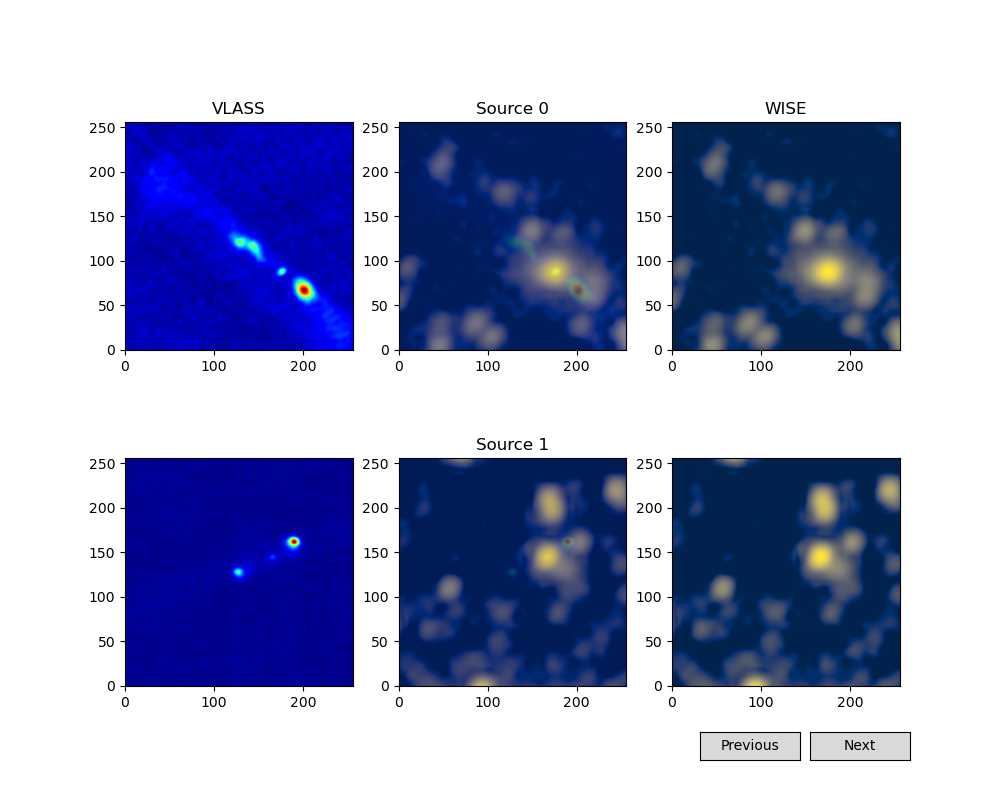

IndexError: list index out of range

In [3]:
plt.close()

sourceLength = len(sources)
nSources = 2

fig, ax = plt.subplots(nSources, 3, figsize=(10, nSources*4))
ax[0][0].set_title('VLASS')
ax[0][1].set_title('VLASS + WISE')
ax[0][2].set_title('WISE')

class Index:
    ind = 0

    def next(self, event):
        for i in range(nSources):
            sources[i+self.ind].setAllCoords(int(ax[i][1].get_xlim()[0]), int(ax[i][1].get_xlim()[1]), 
                int(ax[i][1].get_ylim()[0]), int(ax[i][1].get_ylim()[1]))

        self.ind += nSources
        i = self.ind % sourceLength
        self.showFigures()
        plt.draw()

    def prev(self, event):
        self.ind -= nSources
        i = self.ind % sourceLength
        self.showFigures()
        plt.draw()

    def showFigures(self):
        for i in range(nSources):
            vlass_im = (sources[i+self.ind].images[0].data - np.min(sources[i+self.ind].images[0].data)) # Set min to 0
            vlass_im /= np.max(vlass_im) # Normalize to 0-1 (don't do for real model)

            wise_im = np.log10(sources[i+self.ind].images[1].data - np.min(sources[i+self.ind].images[1].data)) # Set min to 0 and log10
            wise_im = np.clip(wise_im, np.median(wise_im), np.inf) # Clip to median
            wise_im -= np.min(wise_im) # Set min to 0
            wise_im /= np.max(wise_im) # Normalize (don't do for real model)

            ax[i][0].imshow(vlass_im, origin='lower', cmap='jet', vmin=0, vmax=1)
            ax[i][0].set_xlim(0, 256); ax[i][0].set_ylim(0, 256)

            ax[i][1].title.set_text('Source '+str(i+self.ind))
            ax[i][1].imshow(wise_im, origin='lower', cmap='cividis', vmin=0, vmax=1)
            ax[i][1].imshow(vlass_im, origin='lower', cmap='jet', alpha=0.15, vmin=0, vmax=1)
            ax[i][1].set_xlim(0, 256); ax[i][1].set_ylim(0, 256)

            ax[i][2].imshow(wise_im, origin='lower', cmap='cividis', vmin=0, vmax=1)
            ax[i][2].set_xlim(0, 256); ax[i][2].set_ylim(0, 256)

callback = Index()
callback.showFigures()
axprev = fig.add_axes([0.7, 0.05, 0.1, 0.035])
axnext = fig.add_axes([0.81, 0.05, 0.1, 0.035])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()

## Save to training data file

In [4]:
with open('labeled_data/'+filename, 'wb') as f:
        pickle.dump(sources, f)

## Test coordinate saving

In [ ]:
with open('labeled_data/sources_0.obj', 'rb') as f:
    sources = pickle.load(f)

plt.close()
plt.imshow(sources[0].images[0].data, origin='lower', cmap='jet')
plt.xlim(sources[0].images[0].x0, sources[0].images[0].x1)
plt.ylim(sources[0].images[0].y0, sources[0].images[0].y1)
plt.show()

In [ ]:
plt.close()

sourceLength = len(sources)
nSources = 3

fig, ax = plt.subplots(nSources, 3, figsize=(10, 12))
ax[0][0].set_title('VLASS')
ax[0][1].set_title('VLASS + WISE')
ax[0][2].set_title('WISE')

class Index:
    ind = 0

    def next(self, event):
        for i in range(nSources):
            sources[i+self.ind].setAllCoords(int(ax[i][1].get_xlim()[0]), int(ax[i][1].get_xlim()[1]), 
                int(ax[i][1].get_ylim()[0]), int(ax[i][1].get_ylim()[1]))

        self.ind += nSources
        i = self.ind % sourceLength
        self.showFigures()
        plt.draw()

    def prev(self, event):
        self.ind -= nSources
        i = self.ind % sourceLength
        self.showFigures()
        plt.draw()

    def showFigures(self):
        for i in range(nSources):
            (x0,x1) = (sources[i+self.ind].images[0].x0, sources[i+self.ind].images[0].x1)
            (y0,y1) = (sources[i+self.ind].images[0].y0, sources[i+self.ind].images[0].y1)
            ax[i][0].imshow(sources[i+self.ind].images[0].data, origin='lower', cmap='jet')
            ax[i][0].set_xlim(0, 256); ax[i][0].set_ylim(0, 256)

            ax[i][1].title.set_text('Source '+str(i+self.ind))
            ax[i][1].imshow(sources[i+self.ind].images[1].data, origin='lower', cmap='cividis')
            ax[i][1].imshow(sources[i+self.ind].images[0].data, origin='lower', cmap='jet', alpha=0.2)
            ax[i][1].set_xlim(x0, x1)
            ax[i][1].set_ylim(y0, y1)

            ax[i][2].cla()
            ax[i][2].imshow(sources[i+self.ind].images[1].data, origin='lower', cmap='cividis')
            ax[i][2].set_xlim(0, 256); ax[i][2].set_ylim(0, 256)
            
            # Create a Rectangle patch
            rect = patches.Rectangle((x0, y0), x1-x0, y1-y0, linewidth=1, edgecolor='r', facecolor='none')

            # Add the patch to the final image
            ax[i][2].add_patch(rect)

callback = Index()
callback.showFigures()
axprev = fig.add_axes([0.7, 0.05, 0.1, 0.035])
axnext = fig.add_axes([0.81, 0.05, 0.1, 0.035])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()

print(sources[0].images[0].x0, sources[0].images[0].x1)

## Mirror images and save copies

In [ ]:
with open('labeled_data/sources_0.obj', 'rb') as f:
    sources = pickle.load(f)

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].imshow(sources[0].images[0].data, origin='lower', cmap='jet')
ax[0].scatter((125, 200), (75, 150), color='r')
ax[1].imshow(np.flipud(sources[0].images[0].data), origin='lower', cmap='jet')
ax[1].scatter((125, 200), (256-75, 256-150), color='r')
plt.show()

In [ ]:
filename = 'sources_9.obj'

with open('labeled_data/'+filename, 'rb') as f:
    sources = pickle.load(f)

ud_sources = []
lr_sources = []
udlr_sources = []
for src in sources:
    ud_src = mwv.MultiWVSource(src.ra, src.dec, lsDownload=False)
    ud_src.images = []
    ud_src.images.append(mwv.Image(src.images[0].name, np.flipud(src.images[0].data), src.images[0].hdr, src.images[0].wcs, src.images[0].url))
    ud_src.images.append(mwv.Image(src.images[1].name, np.flipud(src.images[1].data), src.images[1].hdr, src.images[1].wcs, src.images[1].url))
    ud_src.images.append(mwv.Image(src.images[2].name, np.flipud(src.images[2].data), src.images[2].hdr, src.images[2].wcs, src.images[2].url))
    ud_src.setAllCoords(src.images[0].x0, src.images[0].x1, 256-src.images[0].y0, 256-src.images[0].y1)
    ud_sources.append(ud_src)

    lr_src = mwv.MultiWVSource(src.ra, src.dec, lsDownload=False)
    lr_src.images = []
    lr_src.images.append(mwv.Image(src.images[0].name, np.fliplr(src.images[0].data), src.images[0].hdr, src.images[0].wcs, src.images[0].url))
    lr_src.images.append(mwv.Image(src.images[1].name, np.fliplr(src.images[1].data), src.images[1].hdr, src.images[1].wcs, src.images[1].url))
    lr_src.images.append(mwv.Image(src.images[2].name, np.fliplr(src.images[2].data), src.images[2].hdr, src.images[2].wcs, src.images[2].url))
    lr_src.setAllCoords(256-src.images[0].x0, 256-src.images[0].x1, src.images[0].y0, src.images[0].y1)
    lr_sources.append(lr_src)

    udlr_src = mwv.MultiWVSource(src.ra, src.dec, lsDownload=False)
    udlr_src.images = []
    udlr_src.images.append(mwv.Image(src.images[0].name, np.flipud(np.fliplr(src.images[0].data)), src.images[0].hdr, src.images[0].wcs, src.images[0].url))
    udlr_src.images.append(mwv.Image(src.images[1].name, np.flipud(np.fliplr(src.images[1].data)), src.images[1].hdr, src.images[1].wcs, src.images[1].url))
    udlr_src.images.append(mwv.Image(src.images[2].name, np.flipud(np.fliplr(src.images[2].data)), src.images[2].hdr, src.images[2].wcs, src.images[2].url))
    udlr_src.setAllCoords(256-src.images[0].x0, 256-src.images[0].x1, 256-src.images[0].y0, 256-src.images[0].y1)
    udlr_sources.append(udlr_src)

with open('labeled_data/ud_'+filename, 'wb') as f:
    pickle.dump(ud_sources, f)

with open('labeled_data/lr_'+filename, 'wb') as f:
    pickle.dump(lr_sources, f)

with open('labeled_data/udlr_'+filename, 'wb') as f:
    pickle.dump(udlr_sources, f)

## Check mirroring

In [ ]:
with open('labeled_data/'+filename, 'rb') as f:
    sources = pickle.load(f)
    src = sources[0]
with open('labeled_data/ud_'+filename, 'rb') as f:
    ud_sources = pickle.load(f)
    ud_src = ud_sources[0]
with open('labeled_data/lr_'+filename, 'rb') as f:
    lr_sources = pickle.load(f)
    lr_src = lr_sources[0]
with open('labeled_data/udlr_'+filename, 'rb') as f:
    udlr_sources = pickle.load(f)
    udlr_src = udlr_sources[0]

fig,ax = plt.subplots(1,4, figsize=(10, 4))
ax[0].set_title('Original')
ax[0].imshow(src.images[0].data, origin='lower', cmap='jet')
ax[0].scatter((src.images[0].x0, src.images[0].x1), (src.images[0].y0, src.images[0].y1), color='r')
ax[1].set_title('UD')
ax[1].imshow(ud_src.images[0].data, origin='lower', cmap='jet')
ax[1].scatter((ud_src.images[0].x0, ud_src.images[0].x1), (ud_src.images[0].y0, ud_src.images[0].y1), color='r')
ax[2].set_title('LR')
ax[2].imshow(lr_src.images[0].data, origin='lower', cmap='jet')
ax[2].scatter((lr_src.images[0].x0, lr_src.images[0].x1), (lr_src.images[0].y0, lr_src.images[0].y1), color='r')
ax[3].set_title('UDLR')
ax[3].imshow(udlr_src.images[0].data, origin='lower', cmap='jet')
ax[3].scatter((udlr_src.images[0].x0, udlr_src.images[0].x1), (udlr_src.images[0].y0, udlr_src.images[0].y1), color='r')
plt.show()